## Inicjalizacja środowiska programistycznego

In [45]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#append path with python modules
import importlib
# import sys
# sys.path.append(r"\scratch\modules")
# #Private functions
import plotting_functions as plf
importlib.reload(plf)
# import scratch
import quadratic_equation as qef
importlib.reload(qef);

##Restrict to selected GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

In [44]:
# !df -h
# !ls /scratch/modules
# !ls /scratch/modules/quadratic_equation.py
import quadratic_equation
import plotting_functions

In [42]:
import sys
while "scratch/modules" in sys.path:
    sys.path.remove("scratch/modules")

sys.path.insert(0, "/scratch/modules")

<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Architektura gęsta/w pełni połączona - ang. dense/fully connected, FCN

Standardowa architektura sieci neuronowej to wiele warstw następujących **sekwencyjnie** po sobie.

* warstwy ukryte mają zwykle funkcję aktywacji ReLu:

```Python
tf.keras.layers.Dense(nNeurons, activation="relu", name="layer_{}".format(iLayer))(x)
```

* warstwy wyjściowe mają zwykle funkcję aktywacji:
    * **liniową** - dla zagadnienia regresji:
      <br></br>
      
      ```Python
      tf.keras.layers.Dense(nNeurons, activation="linear", name="layer_{}".format(iLayer))(x)
      ```

     <br></br>
    * **softmax** - dla zagadnienia klasyfikacji:
      <br></br>
      ```Python
       tf.keras.layers.Dense(nNeurons, activation="softmax", name="layer_{}".format(iLayer))(x)
      ```
      <br></br>

Funkcje podawane a konstruktorze można określać, używając nazwy lub podając obiekt funkcji explicite:
```Python
tf.keras.layers.Dense(nNeurons, activation="relu", name="layer_{}".format(iLayer))(x)
tf.keras.layers.Dense(nNeurons, activation=tf.keras.activations.relu, name="layer_{}".format(iLayer))(x)
```

W architekturze gęstej dana warstwa przyjmuje jako wejście wyjście z warstwy poprzedniej. Wyjątkiem jest oczywiście warstwa wejściowa.

Warstwa gęsta, `tf.keras.layers.Dense` przyjmuje wiele argumentów sterujących:
```Python
tf.keras.layers.Dense(
    units,                    # liczba neuronów
    activation=None,          # funkcja aktywacji
    use_bias=True,            # flaga sterująca obecnością wyrazu wolnego: w*x+b
    kernel_initializer='glorot_uniform',# rozkład prawdopodobieństwa dla początkowych wartości wag
    bias_initializer='zeros', # rozkład prawdopodobieństwa dla początkowych wartości wyrazów wolnych
    kernel_regularizer=None,  # funkcja regularyzyjąca wartości wag
    bias_regularizer=None,    # funkcja regularyzyjąca wartości wyrazów wolnych
    activity_regularizer=None,# funkcja regularyzyjąca wartość wyjściową neuronu
    kernel_constraint=None,   # funkcja nakładająca ograniczenia na wartości wag
    bias_constraint=None,     # funkcja nakładająca ograniczenia na wartości wyrazów wolnych
)
```

Sieć neuronowa złożona z
* warstwy wejściowej przyjmującej `nInputs` zmiennych
* dwu warstw ukrytych o `nNeurons` neuronach (jednostkach)
* warstwy wyjściowej o `nOutputNeurons` neuronach

In [3]:
nInputs = 4
nNeurons = 3
nOutputNeurons = 1

inputs = tf.keras.Input(shape=(nInputs,), name="features")

layer1 = tf.keras.layers.Dense(nNeurons, name="layer_1")(inputs)
layer2 = tf.keras.layers.Dense(nNeurons, name="layer_2")(layer1)

outputs = tf.keras.layers.Dense(nOutputNeurons, name = "output")(layer2)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
tf.keras.utils.plot_model(model, 'ML_model.png', show_shapes=True)
model.summary()

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 4)]               0         
                                                                 
 layer_1 (Dense)             (None, 3)                 15        
                                                                 
 layer_2 (Dense)             (None, 3)                 12        
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Definicję modelu dużo wygodniej jest jednak zadać w pętli.

**Proszę:**

Napisać funkcję `getModel()`,

```Python
getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear", nOutputNeurons=1)
```

która przyjmuje następujące argumenty:

* kształt danych wejściowych: `inputShape`
* listę zwierającą liczby neuronów w kolejnych warstwach, włączając warstwę wyjściową: `nNeurons = [64,32,16,8]`
* funkcje aktywacji dla warstw ukrytych i wyjściowej: `hiddenActivation, outputActivation` z odpowiednimi wartościami domyślnymi
* liczbę neuronów wyjściowych: `nOutputNeurons` z domyślną wartością `1`

Następnie proszę zainicjalizować zmienną `model` używając funkcji `getModel()` i wypisać podsumowanie modelu używając metody `summary()`

In [43]:
nInputs = 4
inputShape = (4, )
nNeurons = 3
nOutputNeurons = 1
from tensorflow.keras import backend as K

K.clear_session() 

def getModel(inputShape, nNeurons, hiddenActivation = 'relu', outputActivation = 'linear', nOutputNeurons = 1):
    inputs = tf.keras.Input(shape=inputShape, name="features")
    current_layer = inputs
    for i, Neurons in enumerate(nNeurons):
        new_layer = tf.keras.layers.Dense(Neurons, activation = hiddenActivation, kernel_initializer = tf.keras.initializers.RandomNormal())(current_layer)
        current_layer = new_layer
    outputs = tf.keras.layers.Dense(nOutputNeurons, name = "output", activation = outputActivation)(current_layer)

    return tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")

getModel(inputShape, [64,32,16,8]).summary()

"cos tutaj nie tak z tym numerowaniem"

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)

'cos tutaj nie tak z tym numerowaniem'

**Proszę:**

* korzystając z funkcji `getModel(...)` zbudować model z jedną warstwą ukrytą o 1024 neuronach i jednej cesze wejściowej
* ustawić inicjalizację wag na gaussowską:
  
```Python
tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
  
```
* ustawić inicjalizację wyrazu wolnego według rozkładu płaskiego w zakresie `[-1,1]`:
  
```Python
tf.keras.initializers.RandomUniform(minval=-1, maxval=1)

```
* narysować histogram wartości wag
* narysować histogram wartości wyrazów wolnych

**Wskazówka:** proszę zwrócić uwagę na kształt macierzy wag i wyrazów wolnych przy rysowaniu histogramu

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 4)]               0         
                                                                 
 layer_0 (Dense)             (None, 1024)              5120      
                                                                 
 output (Dense)              (None, 1)                 1025      
                                                                 
Total params: 6145 (24.00 KB)
Trainable params: 6145 (24.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


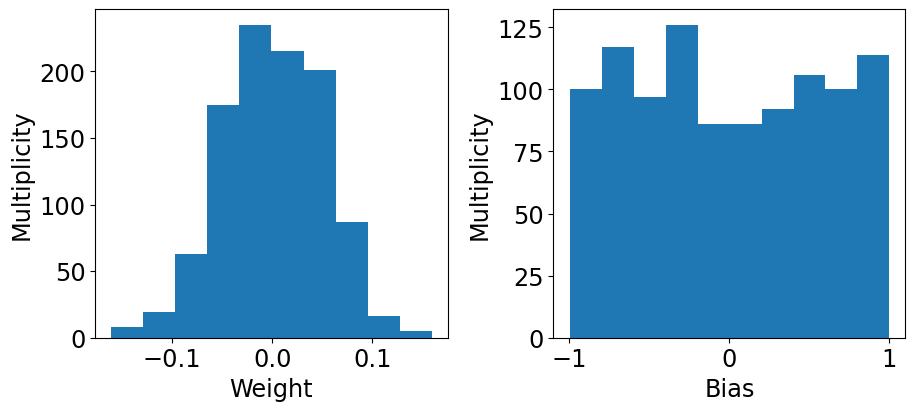

In [41]:

def getModel(inputShape, nNeurons, hiddenActivation = 'relu', outputActivation = 'linear', nOutputNeurons = 1):
    inputs = tf.keras.Input(shape=inputShape, name="features")
    current_layer = inputs
    for i, Neurons in enumerate(nNeurons):
        new_layer = tf.keras.layers.Dense(Neurons, activation = hiddenActivation, name = "layer_"+str(i),
                                          kernel_initializer = tf.keras.initializers.RandomNormal(mean =0.0, stddev = 0.05),
                                          bias_initializer = tf.keras.initializers.RandomUniform(minval = -1, maxval = 1))(current_layer)
        current_layer = new_layer
    outputs = tf.keras.layers.Dense(nOutputNeurons, name = "output", activation = outputActivation)(current_layer)

    return tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")

model = getModel(inputShape, [1024])
model.summary()
"rozwiazanie na zdjeciu z telefonu"
weights = model.get_layer('layer_0').weights[0].numpy()[0,:]
biases = model.get_layer('layer_0').weights[1].numpy()[:]

fig, axes = plt.subplots(1, 2, figsize = (9, 4.5))
axes[0].hist(weights, label = "Layer weights")
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Multiplicity')
axes[1].hist(biases, label = "Layer biases")
axes[1].set_xlabel('Bias')
axes[1].set_ylabel('Multiplicity')
axes[1].set_xlim([-1.1, 1.1])
plt.subplots_adjust(bottom=0.15, left = 0.05, right = 0.95, wspace = 0.3)


Domyślnie wagi warstwy gęstej są inicjalizowane za pomocą rozkładu płaskiego w zakresie `[-w, w]` gdzie
$$
\Large{
w = \frac{\sqrt{6}}{nInput + nOutput}
}
$$

```Python
tf.keras.initializers.GlorotUniform(seed=None)
```

Inicjalizacja typu Glorot (nazwa on nazwiska osoby, która ją zaproponowała) poprawia zbieżność uczenia. W szczególności redukuje efekty
* **zanikania gradientu** - sieć w pewnym momencie, przestaje się uczyć, pomimo ewidentnego niedopasowania do danych
* **wybuchania gradientu** - w pewnym momencie sieć zaczyna zwracać NaN

W niektórych źródłach dla funkcji aktywacji ReLU jest polecana wersja `He uniform`:

$$
\Large{
w = \frac{\sqrt{6}}{nInput}
}
$$

**Proszę:**

* zdefiniować pojedynczą warstwę o 1 neuronie i 12 cechach wejściowych w zakresie `[0,1]`
* użyć domyślnej inicjalizacji wag i wyrazu wolnego
* przygotować 10 000 przykładów o 12 losowych cechach danych rozkładem płaskim w zakresie `[0,1]`
* narysować histogram wartości cech wejściowych
* narysować histogram wartości wyjściowej warstwy
* powtórzyć procedurę dla  wykładnicznego rozkładu cech

**Pytanie**: dlaczego rozkład wartości warstwy jest, jaki jest?

In [ ]:
nPoins = 1000
inputShape = (nPoins, 12)
nNeurons = 1

x = np.random.default_rng().exponential(1, (10000, 12))
# x = np.random.default_rng().uniform(0, 1, (10000, 12))
model = tf.keras.layers.Dense(1) #funkcja ktora bierze argument i wykonaa obliczenia
y_pred = model(x)

Text(0, 0.5, 'Multiplicity')

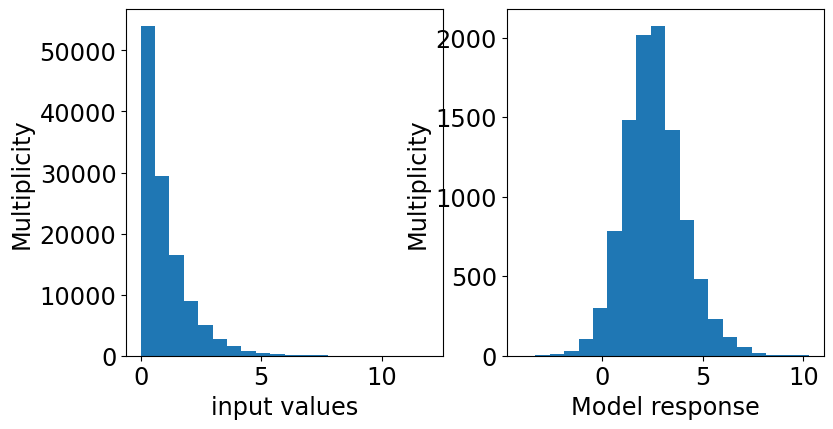

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4.5))
axes[0].hist(x.flatten(), bins = 20)
axes[0].set_xlabel("input values")
axes[0].set_ylabel("Multiplicity")
axes[1].hist(y_pred[:, 0], bins = 20)
axes[1].set_xlabel("Model response")
axes[1].set_ylabel("Multiplicity")


Output mean: 0.1362
Output standard deviation: 0.3837


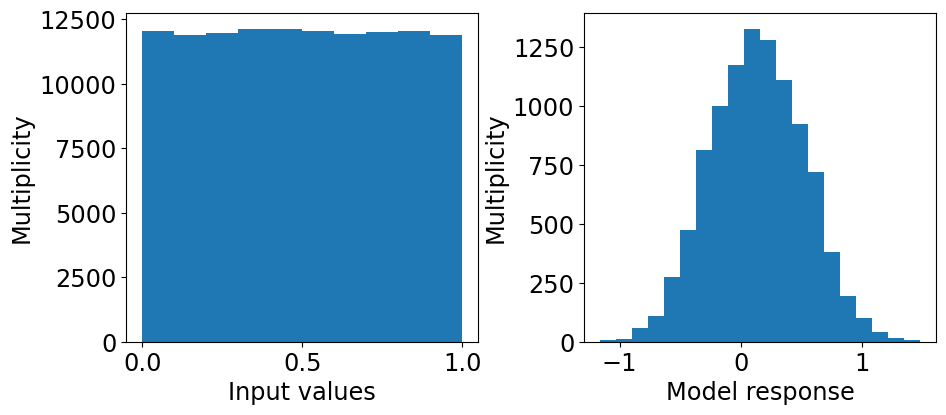

## Rekonstrukcja funkcji schodkowej

**Proszę:**

* wygenerować 256 par $(x,y)$, gdzie:
    * $x$ - liczby losowe zadane rozkładem płaskim w zakresie $[0,1]$
    *
    $$
    \huge{
    y =
    \begin{cases}
      1 & \text{gdy x>0 i x<0.5} \\
      0 & \text{w każdym innym przypadku}
      \end{cases}
    }
    $$
  

* podzielić dane na dwa równe zbiory: treningowy i walidacyjny
* ze zbioru walidacyjnego usunąć punkty na schodku: `|x-0.5|<0.01`
* zdefiniować i wytrenować sieć neuronową, która odtwarza zależność `y(x)`
* narysować ewolucję funkcji straty na zbiorach testowym i walidacyjnym używając funkcji `plotHistory()` z modułu `plotting_functions`
* narysować punkty `danych` i wynik modelu na zbiorze treningowym
* narysować punkty `danych` i wynik modelu na zbiorze walidacyjnym
* modyfikując parametry sieci znaleźć model, który na zbiorze walidacyjnym uzyska precyzję lepszą niż $1\cdot10^{-2}$, gdzie precyzja jest zdefiniowana jako:
$$
\huge{
\delta = \max{|f(x) - Y|}
}
$$

**Wskazówka:** proszę eksperymentować z liczbą warstw, liczbą neuronów, parametrem uczenia, funkcją aktywacji itd.

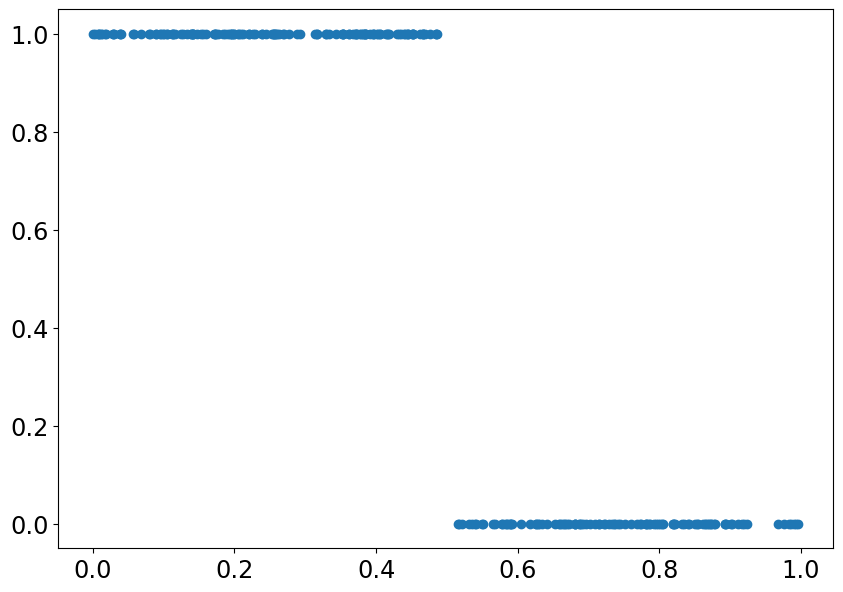

In [28]:
'data preparation'
x = np.random.default_rng().uniform(0, 1, (256))
selector = abs(x-0.5) < 0.01
x_crop = x[~selector]
x = x_crop
y = np.round(x)
y = (x > 0)*(x<0.5)
plt.scatter(x, y)
data = np.column_stack([x, y])
train_data = data[:data.shape[0]//2, :]
valid_data = data[data.shape[0]//2:, :]

In [58]:
inputShape = (1, )
nNeurons = np.full((8,), 32)
def getModel(inputShape, nNeurons, hiddenActivation = 'relu', outputActivation = 'linear', nOutputNeurons = 1, lr = 1e-3):
    inputs = tf.keras.Input(shape=inputShape, name="features")
    current_layer = inputs
    for i, Neurons in enumerate(nNeurons):
        new_layer = tf.keras.layers.Dense(Neurons, activation = hiddenActivation, name = "layer_"+str(i))(current_layer)
                                        #   kernel_initializer = tf.keras.initializers.RandomNormal(mean =0.0, stddev = 0.05),
                                        #   bias_initializer = tf.keras.initializers.RandomUniform(minval = -1, maxval = 1))(current_layer)
        current_layer = new_layer
    outputs = tf.keras.layers.Dense(nOutputNeurons, name = "output", activation = outputActivation)(current_layer)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss=tf.keras.losses.MeanSquaredError())


    return model

initial_learning_rate = 1e-3
# lr_schedule = tf.keras.optimizers.
model = getModel(inputShape, nNeurons, lr = initial_learning_rate)
nEpochs = 150
history = model.fit(x=train_data[:, 0], y=train_data[:, 1], epochs=nEpochs, verbose=0, batch_size = 8, validation_data = (valid_data[:, 0], valid_data[:, 1]))
metrics = model.evaluate(x=x, y=y)
y_pred = model.predict(x)

8/8 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 5ms/step
delta_valid : 0.198060542345047 delta_train : 0.22949203848838806


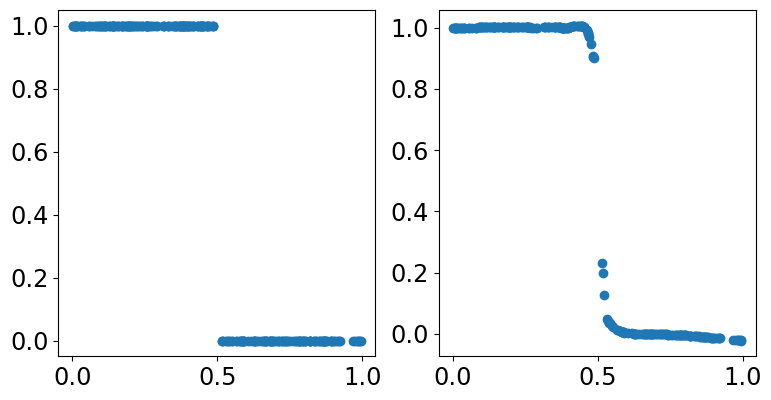

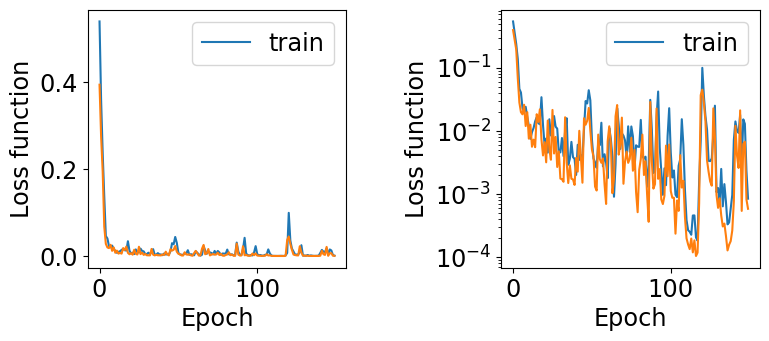

In [83]:
"plotting"
fig, axes = plt.subplots(1, 2, figsize = (9, 4.5))
axes[0].scatter(x, y)
axes[1].scatter(x, y_pred)
plf.plotTrainHistory(history)
"delta calculation"
y_pred_train = model.predict(train_data[:, 0])
delta_train = np.max(abs(train_data[:, 1] - y_pred_train.reshape(1, -1)))

y_pred_valid = model.predict(valid_data[:, 0])
delta_valid = np.max(abs(valid_data[:, 1] - y_pred_valid.reshape(1, -1)))

print(f'delta_valid : {delta_valid} delta_train : {delta_train}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step
Delta on training set: 0.0017
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Delta on validation set: 0.0010
CPU times: user 1min 13s, sys: 6.49 s, total: 1min 20s
Wall time: 1min 11s


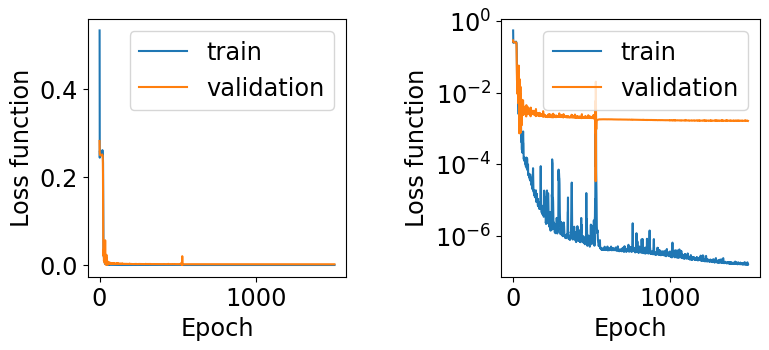

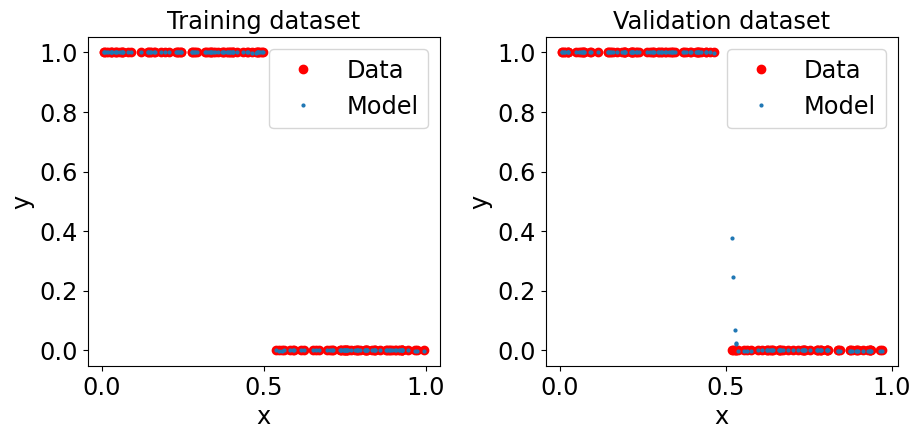

In [ ]:
%%time
...rozwiązanie...
pass

**Proszę:**

* narysować powiększenie rysunku z danymi i wynikiem modelu dla obszaru przed schodkiem: x$\in$[0.41, 0.51], y$\in$[0.99, 1.01]
* narysować powiększenie rysunku z danymi i wynikiem modelu dla obszaru za schodkiem: x$\in$[0.49, 0.61], y$\in$[-0.01, 0.01]

In [ ]:
'data preparation'
x = np.random.default_rng().uniform(0, 1, (2000))
selector = abs(x-0.5) < 0.01
x_crop = x[~selector]
x = x_crop
y = np.round(x)
y = (x > 0)*(x<0.5)
plt.scatter(x, y)
data = np.column_stack([x, y])
train_data = data[:data.shape[0]//2, :]
valid_data = data[data.shape[0]//2:, :]

initial_learning_rate = 1e-3
# lr_schedule = tf.keras.optimizers.
model = getModel(inputShape, nNeurons, lr = initial_learning_rate)
nEpochs = 250
history = model.fit(x=train_data[:, 0], y=train_data[:, 1], epochs=nEpochs, verbose=0, batch_size = 8, validation_data = (valid_data[:, 0], valid_data[:, 1]))
metrics = model.evaluate(x=x, y=y)
y_pred = model.predict(x)


31/31 [==============================] - 0s 4ms/step
delta_valid : 0.4347938895225525 delta_train : 0.23618362843990326


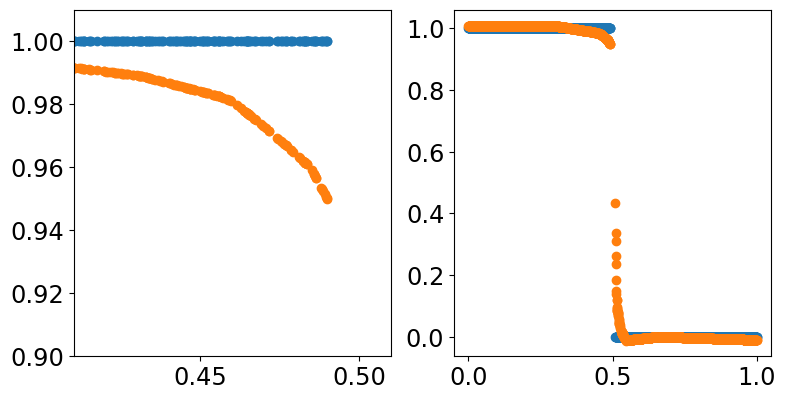

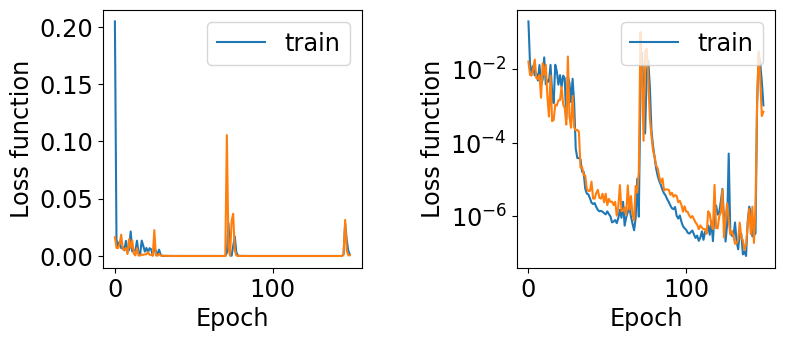

In [96]:
"plotting"
fig, axes = plt.subplots(1, 2, figsize = (9, 4.5))
axes[0].scatter(x, y, label = 'data')
axes[0].scatter(x, y_pred, label = 'fit')
axes[0].set_xlim([0.41, 0.51])
axes[0].set_ylim([0.9, 1.01])
axes[1].scatter(x, y, label = 'data')
axes[1].scatter(x, y_pred, label = 'fit')
# axes[1].set_xlim([0.49, 0.61])
# axes[1].set_ylim([-.01, 0.01])
plf.plotTrainHistory(history)
"delta calculation"
y_pred_train = model.predict(train_data[:, 0])
delta_train = np.max(abs(train_data[:, 1] - y_pred_train.reshape(1, -1)))

y_pred_valid = model.predict(valid_data[:, 0])
delta_valid = np.max(abs(valid_data[:, 1] - y_pred_valid.reshape(1, -1)))

print(f'delta_valid : {delta_valid} delta_train : {delta_train}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


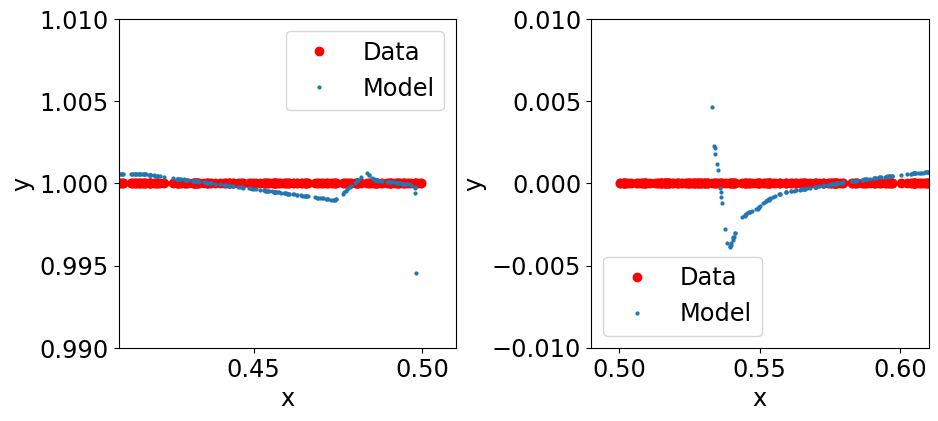

In [ ]:
...rozwiązanie...
pass

**Proszę:**

* narysować dane i odpowiedź modelu w zakresie poza obszarem użytym do treningu: x$\in$[-5,5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step


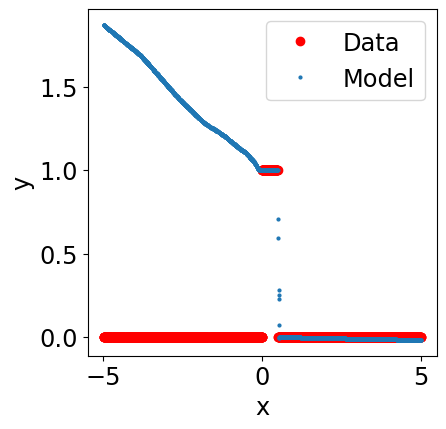

In [ ]:
...rozwiązanie...
pass

## Sieć rozwiązująca równane kwadratowe.

**Proszę:**

Przygotować zbiór danych dotyczących rozwiązywania równania kwadratowego:

* x - współczynniki równania w zakresie [-1,1]$^{3}$
* y - rozwiązywalność równania: `True/False`.
* ustawić kształt zmiennej `y` na `(-1,1)`
* użyć po 1000 przykładów zbioru uczącego i 10000 dla walidacyjnego
* wypisać na ekran kształty danych.

In [ ]:
...rozwiązanie...
print(colored("Training data shapes: ","blue"), x_train.shape, y_train.shape)
print(colored("Validation data shapes: ","blue"), x_val.shape, y_val.shape)

Training data shapes:  (1000, 3) (1000, 1)
Validation data shapes:  (10000, 3) (10000, 1)


**Proszę:**

* wytrenować sieć, która odpowiada na pytanie: **Czy równanie ma rozwiązania?**
* spróbować uzyskać na zbiorze walidacyjnym poprawną odpowiedź w >99% przypadków
* kod trenujący powinien być zawarty w funkcji `quadraticEqMLSolver(x_train, y_train, x_val, y_val)` i zawierać:
    * definicję modelu - z użyciem funkcji `getModel(...)`
    * harmonogram zmiany współczynika uczenia
    * trening **bez** wywołania wczesnego zatrzymania, ale z definicją odpowiednich metryk:
    ```Python
    
    metrics=['Accuracy','FalsePositives']
    ```
    <br></br>
    * rysowane historii funkcji straty
    * wypisanie dokładności, `accuracy` i `false positive rate` obliczonych na zbiorze walidacyjnym z użyciem metody `evaluate`:
      ```Python
      
      model.evaluate(x_train, y_train)
      model.evaluate(x_val, y_val)
      ```
      <br></br>
* funkcja `quadraticEqMLSolver(x_train, y_train, x_val, y_val)` powinna zwracać wytrenowany model

**Wskazówka:** jaka powinna być funkcja aktywacji neuronu wyjściowego?  

Epoch 45: early stopping
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.9752 - FalsePositives: 13.5758 - loss: 0.0632
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - Accuracy: 0.9626 - FalsePositives: 174.5701 - loss: 0.0796
Validation accuracy: 0.9639999866485596
Validation FPR 0.09213726019994596
CPU times: user 15.2 s, sys: 1.21 s, total: 16.4 s
Wall time: 12.3 s


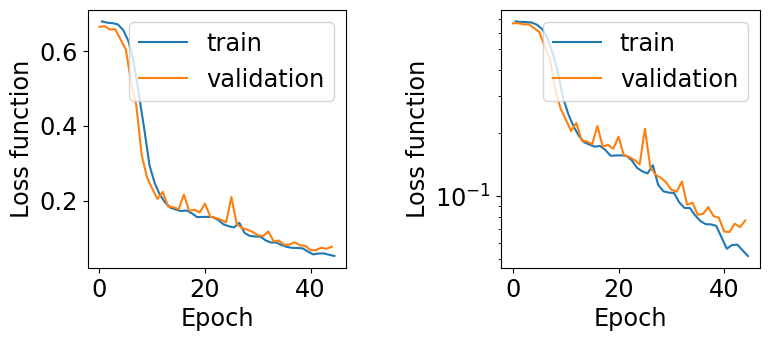

In [ ]:
%%time
def quadraticEqMLSolver(x_train, y_train, x_val, y_val):

    #Model definition
...rozwiązanie...

    #Training
...rozwiązanie...
    #Plotting
...rozwiązanie...
    return model

model = quadraticEqMLSolver(x_train, y_train, x_val, y_val);

<img border="0" alt="overtraining"
    src="attachment:abeda6fd-e27e-426e-ade7-50338a6b5ffd.png"
    width="600" height="600" align="left">

**przetrenowanie:** model dopasowuje się do konkretnych wartości
obecnych w zbiorze uczącym, ale słano się `generalizuje` - reaguje na
nowe wartości nieobecne w zbiorze uczącycm.

**typowy objaw:** funkcja straty maleje na zbiorze uczącym, ale zatrzymuje się, lub nawet zaczyna rosnąć na zbiorze testowym.

**lekarstwa:**

* zwiększenie zbioru uczącego
* regularyzacja modelu

**Proszę:**

* zwiększyć rozmiar próbki uczącej do 10 000 przykładów i przeprowadzić trening ponownie
* trening zajmnie kilka minut - proszę go uruchomić w czasie przerwy

Training data shapes:  (10000, 3) (10000, 1)
Validation data shapes:  (10000, 3) (10000, 1)
Epoch 23: early stopping
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - Accuracy: 0.9906 - FalsePositives: 2.0446 - loss: 0.0223    
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - Accuracy: 0.9843 - FalsePositives: 3.7357 - loss: 0.0368
Validation accuracy: 0.9850999712944031
Validation FPR 0.0021615779519048904
CPU times: user 14.6 s, sys: 1.03 s, total: 15.6 s
Wall time: 11.7 s


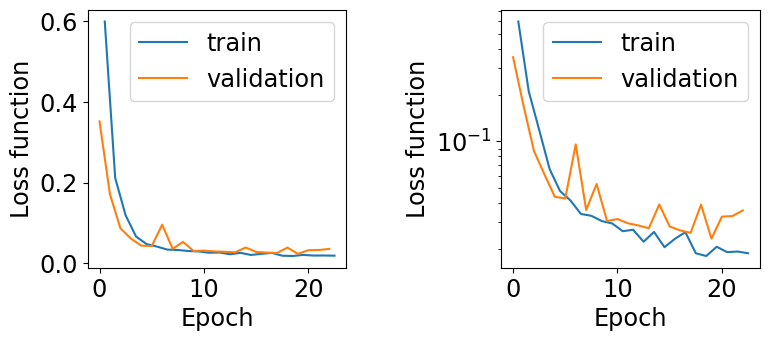

In [ ]:
%%time
...rozwiązanie...
pass

## Regularyzacja wag

Standardową procedurą przeciwdziałającą przeuczeniu jest nałożenie ograniczeń na wartości wag. Dwa najbardziej popularne warianty to:

* **regularyzacja L1:**
$$
\huge{
\sum |w_{i}| < C
}
$$

* **regularyzacja L2:**
$$
\huge{
\sum w_{i}^{2} < C
}
$$

Regularyzacja `l1` może sprowadzić niektóre wagi modelu do `0`, czego nie robi `l2`.

Formalnie regularyzację zadaje się poprzez dodanie mnożnika Largange'a do funkcji straty.
W przypadku regularyzacji L2 funkcja straty ma postać:
$$
\huge{
L_{\text regularised} = L_{\text raw} +  \lambda \cdot \sum w_{i}^{2}
}
$$

Regularyzacja może być różna dla każdej warstwy, więc definiuje się ją w konstruktorze warstwy:
```Python
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)  # regularyzacja wag
)
```

**Proszę:**

* wrócić do zbiorów treningowego i walidacyjnego o **1000 elementach**
* w warstwach ukrytych użyć regularyzacji L2
* poeksperymentować z wartością $\lambda$

**Wskazówki:**
* można zmodyfikować funkcję generującą model
* model może utykać w stanie słabego wytrenowania - to jest zjawisko `umierania neuronów` - neurony utykają w stanie z zerowym gradientem.

Epoch 47: early stopping
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.9774 - FalsePositives: 2.3030 - loss: 0.2281    
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - Accuracy: 0.9688 - FalsePositives: 29.3376 - loss: 0.2329
Validation accuracy: 0.9704999923706055
Validation FPR 0.01459065117535801
CPU times: user 15.8 s, sys: 1.36 s, total: 17.1 s
Wall time: 12.7 s


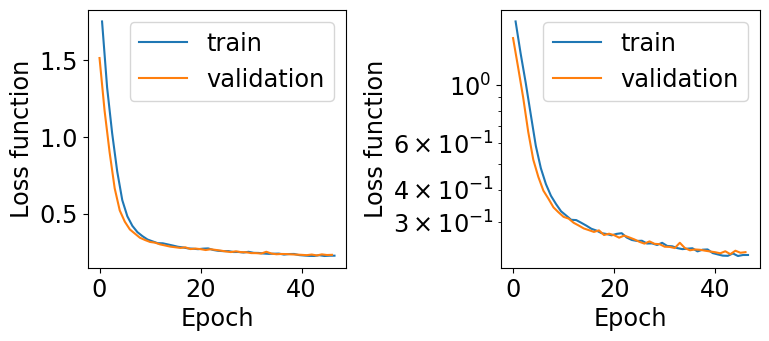

In [ ]:
%%time
...rozwiązanie...
pass

## Regularyzacja przez porzucanie neuronów (ang. dropout)

Inną metodą regularyzacji niż nakładanie warunków na wagi może być wprowadzenie zaburzeń do sieci w czasie treningu.
Najbardziej popularną metodą jest losowe wyłączanie niektórych neuronów, ang. `dropout`.

Algorytm porzucania jest sterowany przez parametr `dropout_rate` który okleśla jaki ułamek neuronów będzie wyłączony w każdej iteracji
pętlu uczącej. **W każdej iteracji są porzucane losowe neurony**.

Porzucanie jest zaimplementowane jako dedykowana warstwa, która odcina wyjście z porzuconych neuronów w poprzedniej warstwie:
```Python
tf.keras.layers.Dropout(
    rate, noise_shape=None, seed=None, **kwargs
)
```

**Uwaga:** porzucanie jest aktywne tylko w czasie treningu. Jeśli używamy metod typu  `model.fit()`, `model.predict()` odpowiedni tryb jest ustawiany automatycznie. Bezpośrednie sterowanie trybem można uzyskać przez wartość parametru `training` operatora `()` modelu:
```Python
model(x_test, training=True)
```
Niestety operator `()` nie działa dla paczek danych. Jeśli chcemy przetwarzać paczki danych trzeba ustawić parametr `training` bezpośrednio dla warstw.

Epoch 34: early stopping
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.9712 - FalsePositives: 4.3636 - loss: 0.2587    
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - Accuracy: 0.9593 - FalsePositives: 77.1146 - loss: 0.2613
Validation accuracy: 0.9624000191688538
Validation FPR 0.03971899486625236
CPU times: user 16.9 s, sys: 1.02 s, total: 17.9 s
Wall time: 14.1 s


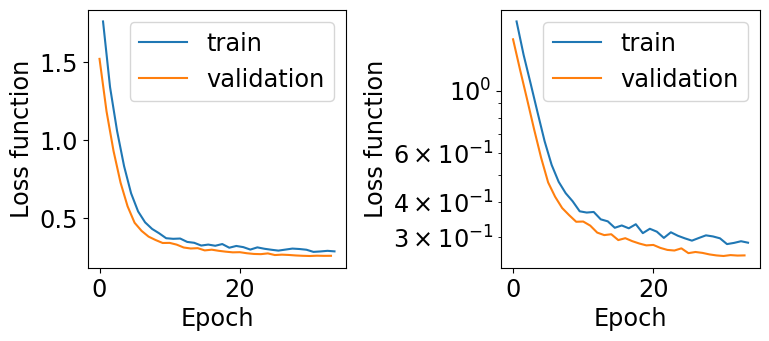

In [ ]:
%%time
...rozwiązanie...
pass

## Regularyzacja Monte Carlo

Regularyzacja przez porzucanie tworzy de facto losowe sieci w każdej iteracji - sieci różnią się listą aktywnych neuronów.
Ten fakt można wykorzystać do stworzenia zespołu (komitetu) sieci w czasie predykcji - wystarczy aktywować warstwy opuszczające w czasie predykcji.
Obliczając średnią z odpowiedzi wielu wariantów sieci możemy zredukować błąd sieci oraz oszacować rozrzut jej wyników.

**Proszę:**

* wytrenować model z regularyzacją L2 i opuszczaniem warstw. Można skorzystać z modelu wytrenowanego w poprzedniej komórce
* stworzyć zbiór 100 odpowiedzi modeli z warstwami opuszczającymi włączonymi na czas predykcji
* odpowiedź komitetu zdefiniować jako:
    * opcję, która uzyska najwięcej głosów
    * opcję dla której średnie prawdopodobieństwo zwrócone przez modele jest większe niż 50%
* obliczyć dokładność i FPR dla zbioru walidacyjnego

**Wskazówki:**
* proszę zajrzeć do dokumentacji `tf.keras.Model` i sprawdzić jak włączyć stan taki jak w czasie treningu
* w trakcje rozwoju kodu można ustawić liczbę modeli na `1` by przyspieszyć pętlę `koduj-testuj`

In [ ]:
%%time
...rozwiązanie...
print(colored("Validation accuracy:","blue"),val_acc)
print(colored("Validation FPR","blue"),val_fpr)
print(colored("Validation FNR","blue"),val_fnr)
pass

Validation accuracy: 0.9617
Validation FPR 0.04079978384220481
Validation FNR 0.03683124305445309
CPU times: user 1.32 s, sys: 52.8 ms, total: 1.38 s
Wall time: 1.61 s


# Zadanie domowe

**Proszę:**

zbudować model, który będzie znajdował rozwiązania równania kwadratowego. Można przyjąć, że model otrzymuje jedynie równania które mają rozwiązania.

* proszę narysować histogram różnicy względnej:

  $$
   \delta = \frac{model - true}{true}
  $$
* proszę obliczyć wartość metryki:
  $$
  x = \text{ułamek przypadków dla których}~\delta<10^{-2}
  $$

Można próbować wszyskiego (poza oszukiwaniem), by uzyskać dobrą precyzję modeli. "Dobra" precyzja to $x>0.1$.

Jeśli wyniki nie będą spektakularne należy co najmniej uzasadnić, że model się uczy, tzn. wyniki modelu są w jakimś stopniu skorelowane z oczekiwanymi wartościami.

In [ ]:
#Input data preparation
...rozwiązanie...
pass

Training data shapes:  (11996, 3) (11996, 2)
Validation data shapes:  (10000, 3) (10000, 2)


Training dataset.
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fraction of events with Y==Y_pred: 0.0005835278426142048
Fraction of examples with abs(pull)<0.01: 0.08
Pull standard deviation: 21.07
Validation dataset.
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step
Fraction of events with Y==Y_pred: 0.0002
Fraction of examples with abs(pull)<0.01: 0.07
Pull standard deviation: 1765.41
CPU times: user 38min 36s, sys: 1min 59s, total: 40min 36s
Wall time: 35min 6s


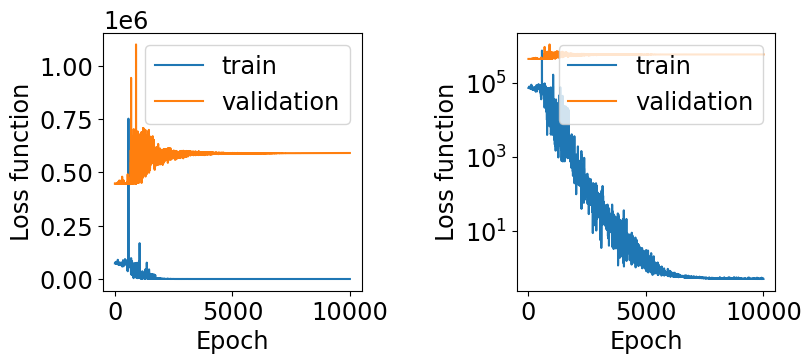

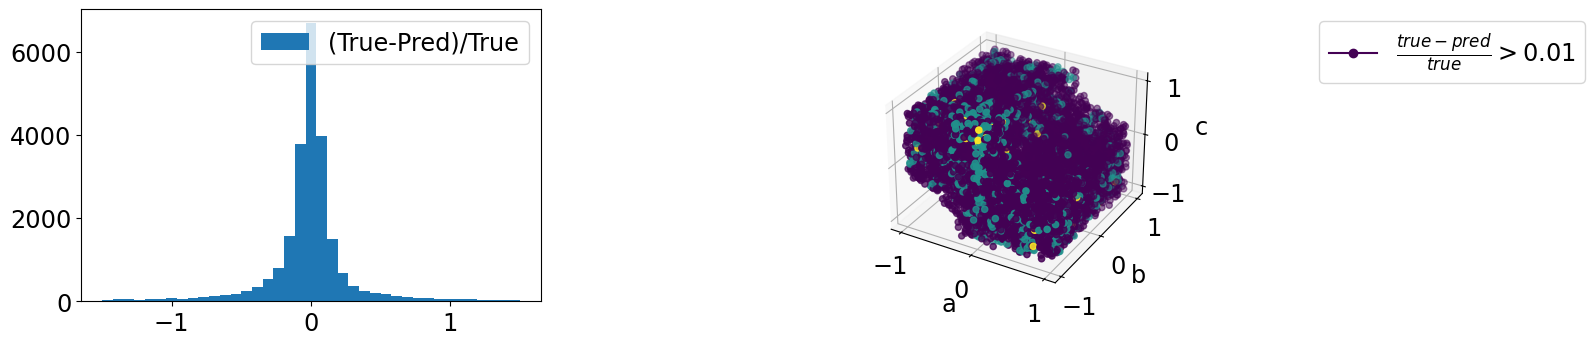

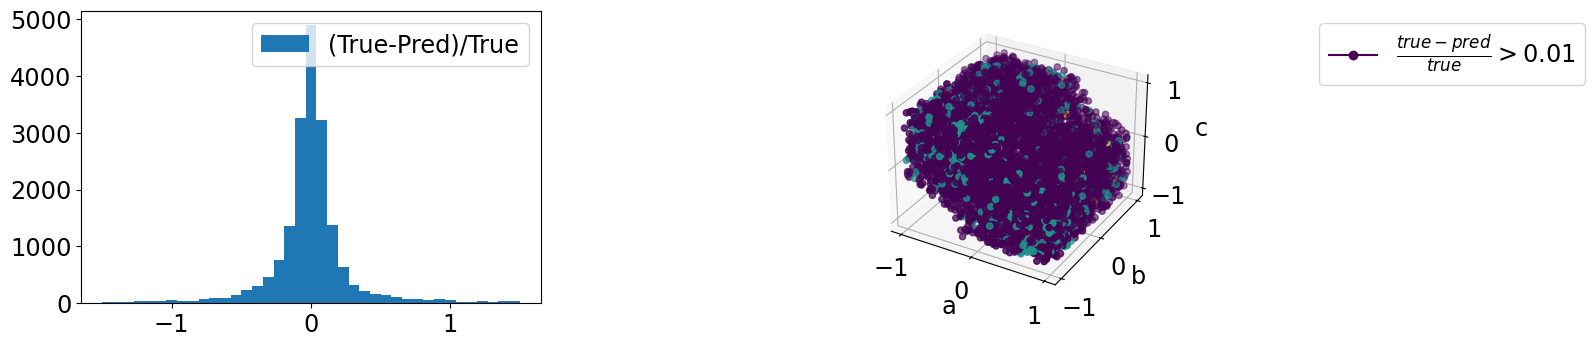

In [ ]:
%%time
#model definition and training
...rozwiązanie...
pass

I0000 00:00:1712656023.976299  126309 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_9', 232 bytes spill stores, 232 bytes spill loads

I0000 00:00:1712656024.761624  126305 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_9', 232 bytes spill stores, 232 bytes spill loads



Training dataset.
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fraction of events with Y==Y_pred: 0.00012504168056018673
Fraction of examples with abs(pull)<0.01: 0.07
Pull standard deviation: 7.21
Validation dataset.
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step
Fraction of events with Y==Y_pred: 0.0001
Fraction of examples with abs(pull)<0.01: 0.08
Pull standard deviation: 6.99
CPU times: user 29.1 s, sys: 1.91 s, total: 31 s
Wall time: 27.5 s


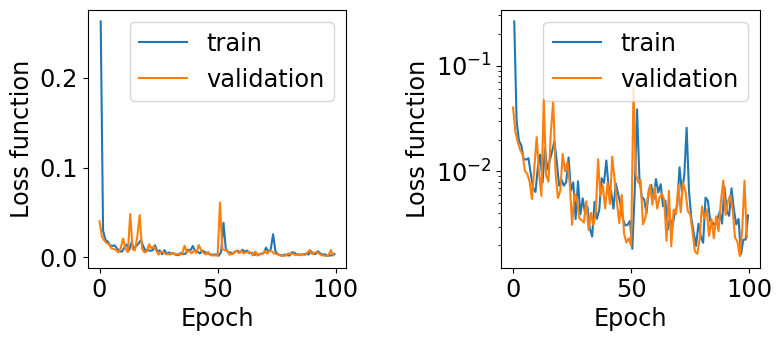

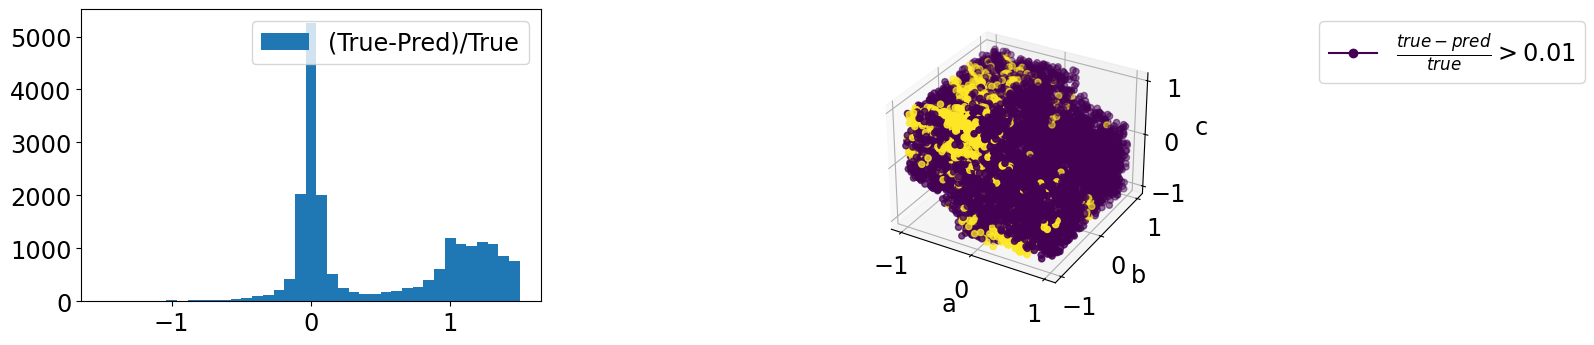

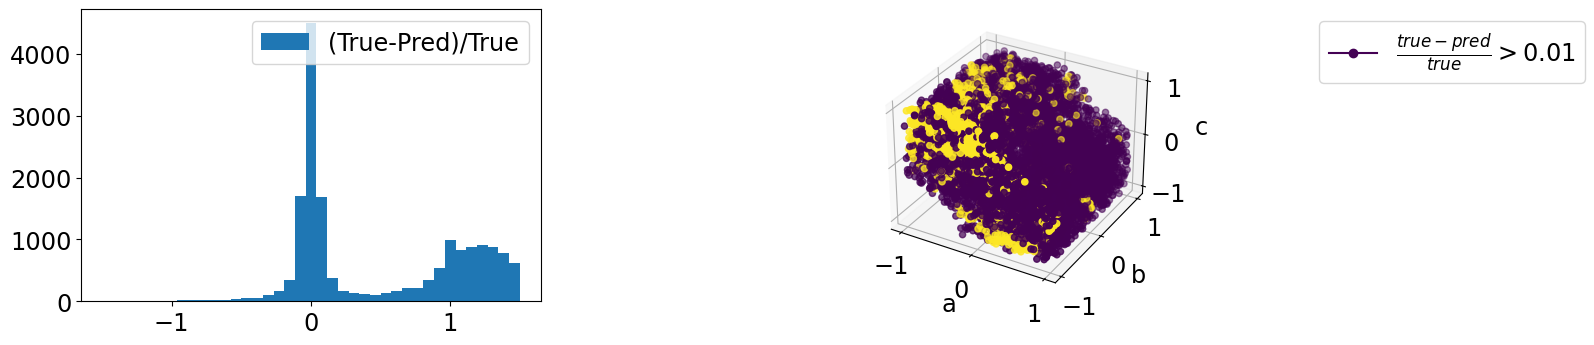

In [ ]:
%%time
...rozwiązanie...
pass